# NETWORK FOR COMPETITION: NOTE THAT KERAS IS USED AND IS THUS NOT A VALID ATTEMPT FOR THE COMPETETION
Since we have expererience with DL it seemed redundant to do it all from scatch and instead we used the time to get more familiar with DL libraries to get a better practical understanding of developing neural networks. Thus the results in this notebook are not eligble for competetion however they show the strength of leveraging a strong framework

In [1]:
#Load required packages
import numpy as np
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
#Parameters
num_classes = 10
opt = "adam"
loss_f = 'categorical_crossentropy'
batch_size = 64
nb_epochs = 2

In [3]:
# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Normalize data and turn to categorical

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float')
X_test = X_test.astype('float')
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

(60000, 10)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


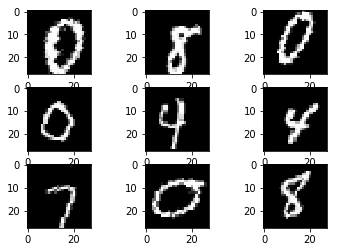

In [5]:
#Augment the input data to get more training data.
#Section is inspired by: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

datagen = ImageDataGenerator(rotation_range = 20, 
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range=0.2)

datagen.fit(X_train)

#Show result
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break
    
train_generator = datagen.flow(X_train, y_train, batch_size = batch_size)

#Define validation generator
test_gen = ImageDataGenerator()
test_generator = test_gen.flow(X_test, y_test, batch_size=batch_size)

In [6]:
#Define model.
#We use two convolutional blocks, which both contains two convolutinal
#with maxpooling at the end. Finally put result into a dense layer.
from Keras_RCNN import BuildRCNN

model = BuildRCNN(1, 28, 28, nbClasses=num_classes, nbRCL=2, nbFilters=32, filtersize= 3)

print(model.summary())

Instructions for updating:
keep_dims is deprecated, use keepdims instead
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 28, 28, 32)    320         input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 28, 28, 28)    924         conv2d_1[0][0]                   
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 28, 28, 28)    112         conv2d_2[0][0]                   
__________________

In [7]:
#Compile the model
model.compile(loss=loss_f,
              optimizer=opt,
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
#Fit the model

model.fit_generator(train_generator, 
                    steps_per_epoch = len(X_train) / batch_size,
                    epochs = nb_epochs,
                    validation_data = test_generator,
                    validation_steps = len(y_test)/ batch_size)

"""
model.fit(x=X_train, y=y_train, batch_size = batch_size, 
          epochs=nb_epochs, validation_data= (X_test, y_test))
"""

Epoch 1/2
938/937 [==============================] - 688s - loss: 0.3852 - acc: 0.8819 - val_loss: 0.1013 - val_acc: 0.9666
Epoch 2/2
  5/937 [..............................] - ETA: 741s - loss: 0.1471 - acc: 0.9594

In [ ]:
#Evaluate performance of model
score = model.evaluate(X_test, y_test, verbose=0)
print(score[1])